In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import time
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [23]:
# loading the dataset
data_path = 'letter-recognition.data'
columns = ['letter'] + [f'feature_{i}' for i in range(16)]
df = pd.read_csv(data_path, names=columns)

In [24]:
label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['letter'])
X = df.drop(['letter', 'target'], axis=1)
y = df['target']

In [25]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
class_mapping = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
    10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T',
    20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'
}

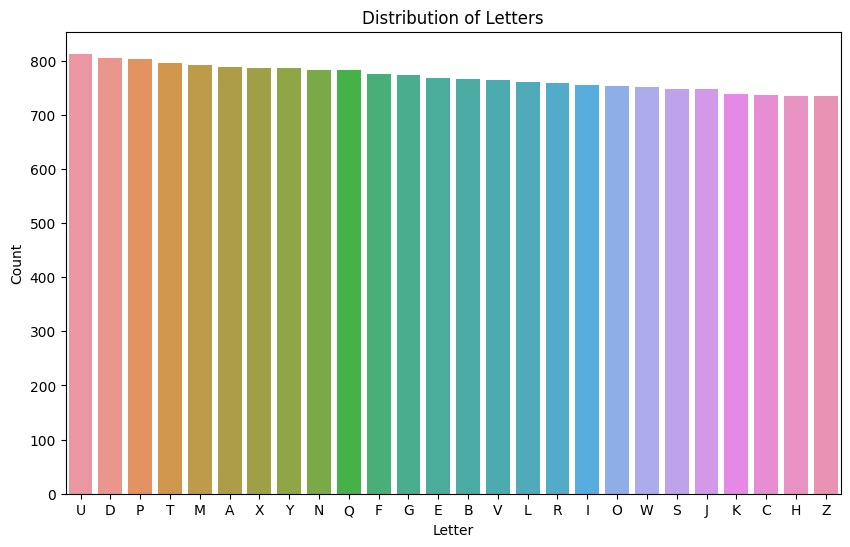

In [27]:
# Plot a countplot to show the distribution of the target variable 'letter'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='letter', order=df['letter'].value_counts().index)
plt.title('Distribution of Letters')
plt.xlabel('Letter')
plt.ylabel('Count')
plt.show()

In [28]:
# fitting the model
# Build the deep neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(16,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(26, activation='softmax'))  # 26 classes for letters

C:\Users\MAIZ\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
# Train the model
start_time = time.time()  # Starting the timer
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))
end_time = time.time()  # Ending the timer
# Calculating and printing the time taken for training
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

Epoch 1/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3577 - loss: 2.3532 - val_accuracy: 0.7280 - val_loss: 1.0228
Epoch 2/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7187 - loss: 0.9833 - val_accuracy: 0.7630 - val_loss: 0.8239
Epoch 3/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7765 - loss: 0.7742 - val_accuracy: 0.8140 - val_loss: 0.6785
Epoch 4/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8020 - loss: 0.6694 - val_accuracy: 0.8190 - val_loss: 0.6222
Epoch 5/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8277 - loss: 0.5805 - val_accuracy: 0.8405 - val_loss: 0.5525
Epoch 6/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8371 - loss: 0.5409 - val_accuracy: 0.8618 - val_loss: 0.4831
Epoch 7/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8553 - loss: 0.4753 - val_accuracy: 0.8698 - val_loss: 0.4458
Epoch 8/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8657 - loss: 0.4336 - val_accuracy: 0.

In [31]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - accuracy: 0.9010 - loss: 0.2895
Test Accuracy: 0.9037500023841858


In [32]:
# 1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
user_input = input("Enter values for the 16 features separated by commas: ")
user_input_list = [int(x) for x in user_input.split(',')]

Enter values for the 16 features separated by commas: 4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7


In [33]:
# Convert the user input to a NumPy array
new_data = np.array(user_input_list).reshape(1, -1)

# Use the model to make predictions
start_time = time.time()  # Starting the timer for prediction
predictions = model.predict(new_data)
end_time = time.time()  # Ending the timer for prediction
# Calculating and printing the time taken for prediction
prediction_time = end_time - start_time
print(f"Prediction time: {prediction_time} seconds")

# Display the predictions
predicted_class = np.argmax(predictions)
print(f'\nThe predicted class is: {predicted_class} Means the letter is  {class_mapping[predicted_class]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Prediction time: 0.10433530807495117 seconds

The predicted class is: 18 Means the letter is  S
